# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**План исследования:** 
1. Открытие файла, подключение необходимых библиотек, подготовка к исследованию,изучение общей информации о данных
2. Предобработка данных, включает в себя 
* систематизацию столбцов и разбиению на группы
* установления порядка их обработки
* установлению необходимой предобработки по каждой группе
* предобработка каждой группы с промежуточными выводами
* подведение итогов предобработки
3. Дополнительные расчеты и добавление столбцов в соответствии с техническим заданием
4. Исследовательский анализ данных, который включает в себя:
* Анализ отдельных параметров квартир
* Изучение скорости, как быстро продавались квартиры
* Изучение факторов, влияющих на полную стоимость объекта
* Изучение средней цены одного квадратного метра
* Изучение зависимоти расстояния от центра на стоимость жилья в Санкт-Петербурге
5. Суммаризация исследования и выводы.  


### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

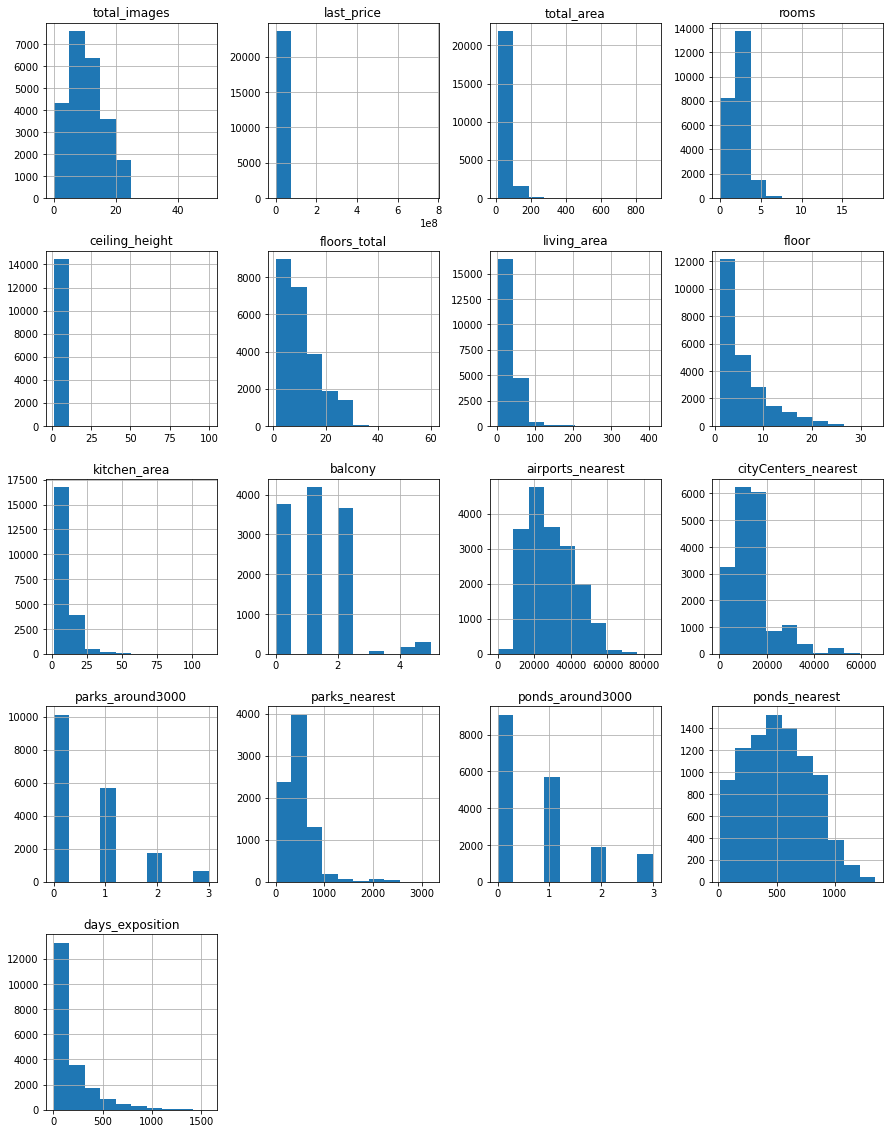

In [5]:
data.hist(figsize=(15, 20))

Первичный просмотр данных показал следующее:

* Данные в CSV файле разделены табуляцией, а не запятой, это отражено в значении параметра sep при открытии файла. 
* Метод info() показал, что во многих колонках есть пропуски, но эти пропуски имеют разную природу.
* Типы данных не везде соответствуют ожидаемым, например, в столбце is_apartment (object) не соответствует ожидаемому (bool), число этажей, комнат, балконов и др. должны иметь целочисленный тип, а дата публикации - формат datetime, а не object.
* В некоторых столбцах, судя по графикам, наблюдаются существенные выносы  

* * * 

### Предобработка данных

#### Проверка дубликатов

In [6]:
data.duplicated().sum()

0

Явных дубликатов не найдено, но могут быть неявные, поэтому следует рассмотреть каждый столбец по отдельности:

* Выявить пропуски и по возможности их заполнить
* Выявить неявные дубликаты
* Преобразовать типы данных
* Выявить аномальные значения, устранить их или исправить. 

#### `total_images` — число фотографий квартиры в объявлении:

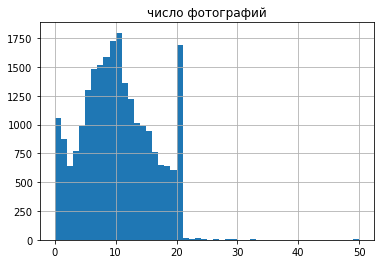

In [7]:
data.total_images.hist(bins=50)
plt.title('число фотографий')
plt.show()

In [8]:
data.loc[(data['total_images'] < 3) | (data['total_images'] > 20), 'total_images'] = data.total_images.median()

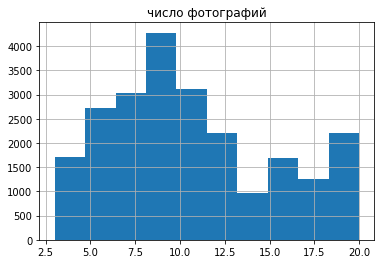

In [150]:
data.total_images.hist()
plt.title('число фотографий')
plt.show()

Проблем с пропусками и типом данных нет. 
Наблюдаемые аномалии:
* Локальный пик на 0 фотографий. Это выглядит как ошибка, поскольку по правилам Яндекс.Недвижимости можно размещать от 3 фотографий для жилых помещений, иначе объявление не пройдет модерацию. Ссылка на [Справку](https://yandex.ru/support/realty/rules/requirements-ads.html)
* Локальный пик на 20 фотографиях, что может быть обусловлено максимальным или рекомендуемым количеством фотографий. На момент исследования (июнь 2023 года) максимум фотографий составляет 30 (указано при добавлении [нового объявления](https://realty.ya.ru/management-new/add/)). Можно предположить, что в 2019 году, когда был составлен исследуемый датасет, максимум фотографий или рекомендуемое их количество составляло 20. 
* Значения ниже 3 и выше 20 похожи на ошибочные. Их заменили на медианные значения по столбцу в пределах от 3 до 20 фото. 

#### `last_price` — цена на момент снятия с публикации

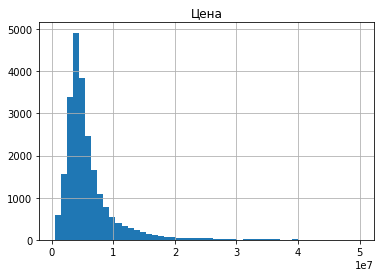

In [151]:
data.last_price.hist(bins=50)
plt.title('Цена')
plt.show()

In [11]:
data.last_price.describe()


count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [12]:
data.query('last_price > 5e7').last_price.count()

131

In [13]:
data.query('last_price > 5e7')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,9.0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
155,8.0,96000000.0,317.0,2017-07-07T00:00:00,4,3.50,3.0,183.0,3,NaN,...,NaN,1.0,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0
464,15.0,66571000.0,280.3,2015-06-11T00:00:00,6,5.20,8.0,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
492,18.0,95000000.0,216.0,2017-12-05T00:00:00,4,3.00,5.0,86.0,4,NaN,...,77.0,NaN,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0
509,5.0,90000000.0,225.0,2016-06-26T00:00:00,6,NaN,4.0,134.0,2,NaN,...,19.5,2.0,Санкт-Петербург,32864.0,5720.0,0.0,NaN,2.0,519.0,416.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22709,20.0,59000000.0,127.5,2016-12-21T00:00:00,4,3.00,12.0,85.0,8,NaN,...,13.0,1.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,635.0
22804,4.0,81960000.0,205.0,2017-09-29T00:00:00,4,3.20,9.0,108.0,3,NaN,...,10.0,NaN,Санкт-Петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,169.0
22831,18.0,289238400.0,187.5,2019-03-19T00:00:00,2,3.37,6.0,63.7,6,NaN,...,30.2,NaN,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN
22907,9.0,65000000.0,228.0,2016-06-02T00:00:00,4,NaN,5.0,200.0,2,NaN,...,NaN,NaN,Санкт-Петербург,22783.0,1295.0,3.0,619.0,3.0,269.0,NaN


In [14]:
data.query('last_price > 5e7').locality_name.unique()

array(['Санкт-Петербург'], dtype=object)

In [15]:
data = data.loc[data.last_price < 5e7]

In [16]:
data.query('last_price < 400000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7.0,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


In [17]:
data.loc[data.last_price < 400000] *= 1000

In [18]:
data.last_price.min()

430000.0

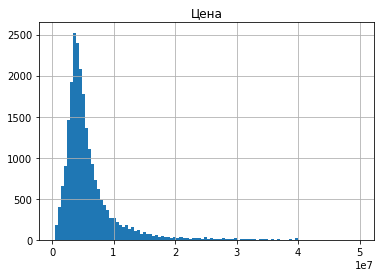

In [152]:
data.last_price.hist(bins=100)
plt.title('Цена')
plt.show()

Проблем с пропусками и типом данных нет. Распределение имеет вид распределения Пуассона с 1 пиком в районе 500 000.  Наблюдаемые аномалии:
* Обнаружилась 1 позиция со стоимостью менее 150 000, находящаяся в 9 км от центра Санкт-Петербурга, с прощадью более 100 кв.м, на 25 этаже 25-этажного дома. Похоже, что стоимость этой квартиры записана пользователем не в рублях, а в тысячах рублей, поэтому цена была умножена на 1000. 
* Также было принято решение не брать во внимание при дальнейших расчетах квартиры стоимостью более 50 млн, поскольку данные по ним также сильно выбиваются из остальных, например, площади квартир, высота потолков и т.д, и они могут негативно отразиться на общей статистике. Таких объектов было 131 и все они находятся в Санкт-Пеьербурге. 



#### `rooms` — число комнат

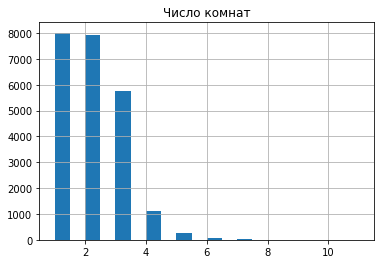

In [154]:
data.rooms.hist(bins=20)
plt.title('Число комнат')
plt.show()

In [21]:
data['rooms'] = data['rooms'].astype('int')

In [22]:
data.loc[data['rooms'] > 6, ['total_area', 'living_area', 'rooms']].sort_values(by='rooms')

,total_area,living_area,rooms
23555,158.5,57.4,7
7694,251.0,193.0,7
7729,248.0,166.7,7
7997,230.0,167.0,7
8559,203.3,104.2,7
...,...,...,...
20829,245.4,168.3,14
866,363.0,222.0,14
18848,270.0,180.0,16
14498,374.6,264.5,19


In [23]:
data.loc[8793]

total_images                                                       7000.0
last_price                                                     12190000.0
total_area                                                       109000.0
first_day_exposition    2019-03-20T00:00:002019-03-20T00:00:002019-03-...
rooms                                                                2000
ceiling_height                                                     2750.0
floors_total                                                      25000.0
living_area                                                       32000.0
floor                                                               25000
is_apartment                                                          NaN
studio                                                                  0
open_plan                                                               0
kitchen_area                                                      40500.0
balcony                               

In [24]:
data = data.drop(labels = [8793],axis = 0)

In [25]:
data.loc[data['rooms'] == 0, ['total_area', 'living_area', 'rooms', 'studio']]

,total_area,living_area,rooms,studio
144,27.00,15.50,0,True
349,25.00,17.00,0,False
440,27.11,24.75,0,True
508,34.40,24.30,0,False
608,25.00,NaN,0,True
...,...,...,...,...
23210,26.00,18.00,0,True
23442,27.70,18.00,0,False
23554,26.00,NaN,0,True
23592,29.00,18.00,0,False


In [26]:
data = data.where(data['rooms'] != 0, 1)

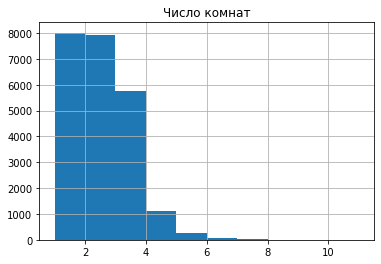

In [155]:
data.rooms.hist()
plt.title('Число комнат')
plt.show()

Тип данных в столбце с числом комнат был изменен на целочисленный. 
Были расссмотрены крайние случаи с 0 комнат и большим числом комнат (больше 6):
* Значение комнат 0 по общей и жилой площади, соответствовало однокомнатным квартирам и квартирам-студиям, поэтому число комнат было изменено в этом случае на 1. 
* Аномалий при большом числе комнат не обнаружено, они соответствуют квартирам с большой общей и жилой площадью. 
* Найдена и удалена строка с аномальными значениями по нескольким параметрам.

#### Группа параметров, связанных с площадью квартир

**`total_area` — общая площадь квартиры в квадратных метрах (м²)**  
**`living_area` — жилая площадь в квадратных метрах (м²)**  
**`kitchen_area` — площадь кухни в квадратных метрах (м²)**

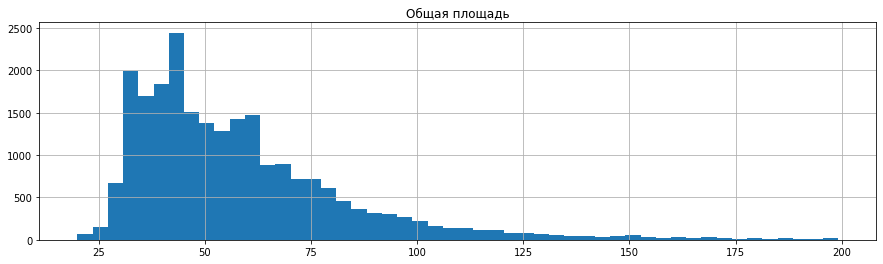

In [156]:
data.total_area.hist(bins=50, figsize=(15, 4))
plt.title('Общая площадь')
plt.show()

In [29]:
data.total_area.sort_values(ascending=False)

9826     494.10
660      483.90
6221     470.30
20273    460.80
3676     441.98
          ...  
19735      1.00
3874       1.00
9487       1.00
9511       1.00
1277       1.00
Name: total_area, Length: 23560, dtype: float64

In [30]:
data.query('total_area < 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1.0,1.0,1.0,1,1,1.0,1.0,1.0,1,1,...,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
349,1.0,1.0,1.0,1,1,1.0,1.0,1.0,1,1,...,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
440,1.0,1.0,1.0,1,1,1.0,1.0,1.0,1,1,...,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
508,1.0,1.0,1.0,1,1,1.0,1.0,1.0,1,1,...,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
608,1.0,1.0,1.0,1,1,1.0,1.0,1.0,1,1,...,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,1.0,1.0,1.0,1,1,1.0,1.0,1.0,1,1,...,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
23442,1.0,1.0,1.0,1,1,1.0,1.0,1.0,1,1,...,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
23554,1.0,1.0,1.0,1,1,1.0,1.0,1.0,1,1,...,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
23592,1.0,1.0,1.0,1,1,1.0,1.0,1.0,1,1,...,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0


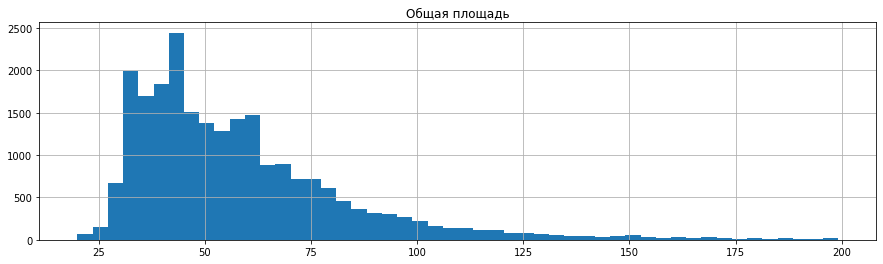

In [157]:
data.total_area.hist(bins=50, figsize=(15, 4))
plt.title('Общая площадь')
plt.show()

In [32]:
data.loc[data.total_area > 200].total_area.count()

145

In [33]:
data = data.loc[(data.total_area >= 20) & (data.total_area < 200) ]

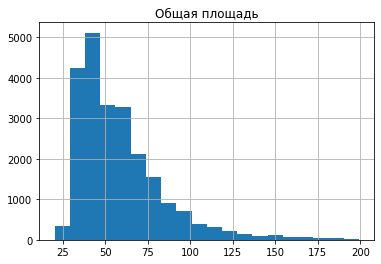

In [158]:
data.total_area.hist(bins=20)
plt.title('Общая площадь')
plt.show()

Проблем с пропусками и типом данных нет. Распределение имеет вид распределения Пуассона, дополнительных пиков нет.
Наблюдаемые аномалии:

* Обнаружена 1 квартира с ошибочно введенной площадью 5500 000 кв.м. Судя по тому, что жилая площадь там 48 кв.м., можно считать, что правильным значением было 55 кв.м.
* Обнаружены слишком малые квартиры, площадью меньше 20 кв.м, не соответствующие СНиПам по нормам нежилой территории, было принято решение исключить их их рассмотрения. 
* Площадь 145 квартир превышает 200 м.кв., их мы тоже рассматривать не будем, поскольку покупка такого вида жилья - особые случаи, и сопровождаются выносами по многим параметрам. Их исключение приведет к меньшим аномалиям в других столбцах. 
 * * * 

In [35]:
data.living_area.describe()

count    21350.000000
mean        33.271115
std         17.190760
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

In [36]:
data.living_area.isna().sum()

1847

In [37]:
data['living_area'] = data.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.median()))

In [38]:
data.living_area.isna().sum()

0

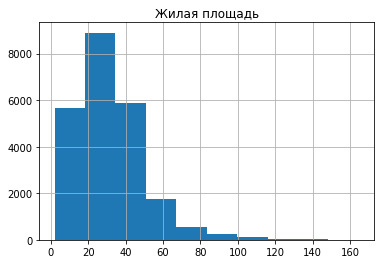

In [159]:
data.living_area.hist()
plt.title('Жилая площадь')
plt.show()

In [40]:
data.kitchen_area.isna().sum()

2031

In [41]:
data['kitchen_area'] = data.groupby('rooms')['kitchen_area'].apply(lambda x: x.fillna(x.median()))

In [42]:
data.kitchen_area.isna().sum()

0

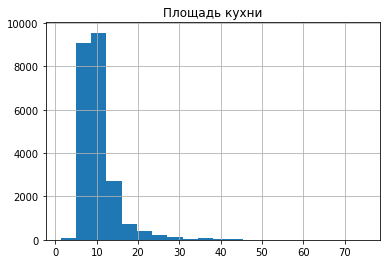

In [161]:
data.kitchen_area.hist(bins=20)
plt.title('Площадь кухни')
plt.show()

* Пропущенные значения жилой площаи и площади кухонь были заполнены медианными значениями для квартир с аналогичным количеством комнат. В остальном, по жилой площади данные выглядят реалистично, выраженных аномалий не обнаружено.

#### `first_day_exposition` — дата публикации

In [44]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [45]:
data['first_day_exposition'].dtypes

dtype('<M8[ns]')

In [46]:
data['first_day_exposition'].min()

Timestamp('2014-11-27 00:00:00')

In [47]:
data['first_day_exposition'].max()

Timestamp('2019-05-03 00:00:00')

* В столбце с датами публикаций пропусков не обнаружено, минимальные и максимальные значения совпадают с вводной информацией датасета. 
* Изменен тип данныйх на datetime64. 

#### `ceiling_height` — высота потолков (м)

In [48]:
data['ceiling_height'].isna().sum()

8968

In [49]:
data['ceiling_height'].describe()


count    14229.000000
mean         2.761598
std          1.253005
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Из описания столбца возьмём медианное значение 2,65 м и подставим его в аномальные и пропущенные значения

In [50]:
data['ceiling_height'] = data['ceiling_height'].replace(100, 2.65)
data['ceiling_height'] = data['ceiling_height'].replace(1, 2.65)
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

In [51]:
data.query('ceiling_height > 5').loc[:, ['ceiling_height', 'total_area', 'last_price']]

,ceiling_height,total_area,last_price
355,25.0,55.2,3600000.0
3148,32.0,75.0,2900000.0
3474,8.0,30.0,1400000.0
4643,25.0,45.0,4300000.0
5076,24.0,30.5,3850000.0
5246,27.0,54.0,2500000.0
5669,26.0,50.0,4400000.0
5807,27.0,80.0,8150000.0
5863,8.3,45.0,5650000.0
6246,25.0,44.4,3300000.0


In [52]:
data.loc[data['ceiling_height'] > 24, 'ceiling_height'] /= 10


In [53]:
data.loc[data['ceiling_height'] > 4, 'ceiling_height'] = 2.65

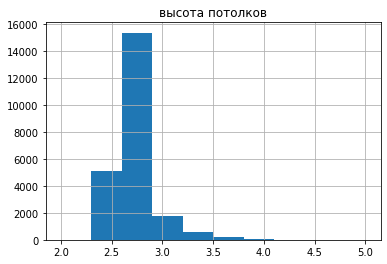

In [162]:
data.ceiling_height.hist(range=(2, 5))
plt.title('высота потолков')
plt.show()

* Пропущенные значения замены на медианные
* Обработаны аномальные значения: высоты потолков 100 и 1 м заменены на медианные, потолки выше 24 м можно считать ошибочно введенными без десятичной запятой, поэтому из значения разделены на 10. Также полтолки выше 4 метров в квартирах тоже являются выносом и заменены на медианные.

#### `locality_name` — название населённого пункта
Его было решено рассмотреть раньше, чем этажность домов и расположения квартиры, поскольку есть предположение, что пропущенные значения этажности можно заменить на медианное по населенному пункту.

In [55]:
data.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [56]:
loc_types = ['посёлок ', 'поселок ', 'городской ', 'деревня ', 'городского типа ',
             'садовое товарищество ', 'село ', 'имени ', 'садоводческое некоммерческое товарищество ',
             'при железнодорожной станции ', 'станции ']
for loc_type in loc_types:
    data['locality_name'] = data.locality_name.str.replace(loc_type, '')
    
data['locality_name'] = data.locality_name.str.replace('ё', 'е').str.lower()    

In [57]:
data = data.dropna(subset=['locality_name'])

In [58]:
sorted(data.locality_name.unique())

['агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная горка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпоселок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зимитицы',
 'ивангород',
 'извара',
 'ильичево',
 'иссад',
 'калитино',

In [163]:
names = {
    'кингисеппский': 'кингисепп',
    'коммунары': 'коммунар',
    'кузьмоловский': 'кузьмолово',
    'русско': 'русско-высоцкое',
    'саперное': 'саперный',
    'свирьстрой': 'свирь',
    'старая': 'старая ладога',
}
for old, new in names.items():
    data['locality_name'] = data['locality_name'].replace(old, new)


Для унификации названий было проведено следующее:
* все названия были переведены в нижний регистр
* буква "ё" заменена на "е"
* исключены строки с отстутствующим значением, т.к. не представляется возможным его установить
* из названий исключены типы населенных пунктов
* согласованы повторяющиеся названия

#### Этажи
**`floors_total` — всего этажей в доме  
`floor` — этаж**

In [60]:
data.floors_total.describe()

count    23067.000000
mean        10.674167
std          6.581081
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [61]:
data.floor.describe()


count    23148.000000
mean         5.883878
std          4.875784
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [62]:
data.query('floors_total > 28').loc[:, ['floors_total', 'floor', 'locality_name']]

,floors_total,floor,locality_name
397,36.0,28,санкт-петербург
871,35.0,23,санкт-петербург
1060,35.0,15,санкт-петербург
1697,34.0,23,санкт-петербург
1917,35.0,30,санкт-петербург
2253,60.0,4,кронштадт
2966,35.0,15,санкт-петербург
3797,29.0,18,парголово
4855,35.0,4,санкт-петербург
5807,36.0,13,санкт-петербург


In [63]:
data.loc[2253, 'floors_total'] = 6
data.loc[16731, 'floors_total'] = 25
data.loc[[397, 1697, 5807, 11079, 11575, 16934],'floors_total'] = 35

In [64]:
data.floors_total.isna().sum()

81

In [65]:
data['floors_total'] = data.groupby('locality_name')['floors_total'].apply(lambda x: x.fillna(x.median()))

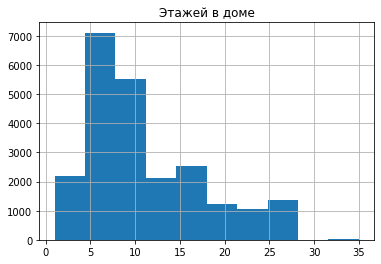

In [164]:
data.floors_total.hist(bins=10)
plt.title('Этажей в доме')
plt.show()

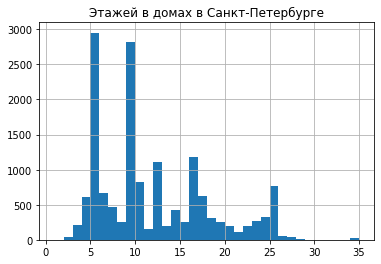

In [165]:
data.loc[data['locality_name'] == 'санкт-петербург']['floors_total'].hist(bins=34)
plt.title('Этажей в домах в Санкт-Петербурге')
plt.show()

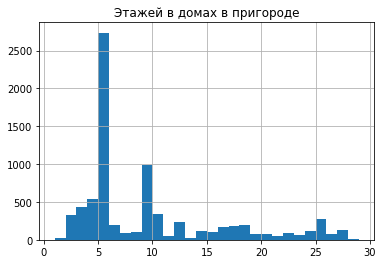

In [166]:
data.loc[data['locality_name'] != 'санкт-петербург']['floors_total'].hist(bins=28)
plt.title('Этажей в домах в пригороде')
plt.show()

In [69]:
data['floors_total'] = data['floors_total'].astype('int')
data['floor'] = data['floor'].astype('int')

In [70]:
data.loc[data['floors_total'] < data['floor']].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
457,4.0,9788348.0,70.80,2015-08-01,2,2.65,9,38.40,12,NaN,...,10.63,0.0,санкт-петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
2392,7.0,5395770.0,53.00,2017-06-29,2,2.65,9,29.00,22,NaN,...,9.00,0.0,санкт-петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4.0,2325000.0,27.80,2016-09-21,1,2.65,9,19.40,15,NaN,...,9.05,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
4617,4.0,4275062.0,61.20,2017-04-27,2,2.65,9,32.00,12,NaN,...,12.20,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,72.0
4848,15.0,13000000.0,98.00,2017-02-08,3,2.65,9,45.00,18,NaN,...,9.50,0.0,санкт-петербург,37625.0,14153.0,0.0,NaN,0.0,NaN,29.0
5146,10.0,3085024.0,33.33,2018-10-06,1,2.65,9,11.00,12,NaN,...,9.05,NaN,санкт-петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,140.0
5784,4.0,4262941.0,59.90,2017-04-02,2,2.65,9,31.70,18,NaN,...,11.90,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
6030,3.0,10900000.0,116.23,2017-05-05,4,2.65,9,62.80,24,NaN,...,11.00,0.0,санкт-петербург,35234.0,14674.0,0.0,NaN,1.0,844.0,83.0
7922,3.0,5426412.0,50.11,2016-06-08,2,2.65,9,26.94,24,NaN,...,11.13,0.0,санкт-петербург,7050.0,13266.0,1.0,868.0,0.0,NaN,14.0
8478,19.0,13500000.0,77.80,2019-04-17,2,2.80,9,39.41,21,NaN,...,13.27,2.0,санкт-петербург,12838.0,11477.0,1.0,593.0,1.0,130.0,NaN


In [71]:
data.floor.isna().sum()

0

In [72]:
data.floors_total.isna().sum()

0

В Санкт-Петербурге жилой дом с максимальным количеством этажей - ЖК "Князь Александр Невский" на проспекте Обуховской обороны. Он насчитывает 37 этажей (2 из которых - подземная парковка). Второй по величине - ЖК «Петр Великий», насчитывает 32 этажа. За ним следуют дома высотой 28 этажей и ниже. (по данным [Википедии](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D0%B0%D0%BC%D1%8B%D1%85_%D0%B2%D1%8B%D1%81%D0%BE%D0%BA%D0%B8%D1%85_%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B9_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0))

В Ленинградской области по данным сайта [ЛенОблДома](https://lenobldoma.ru/doma-po-etazham) максимальная высота жилых домов доставляет до 29 этажей (Мурино, Кудрово, Свердлова, Бугры).

Следовательно, в этом регионе жилой дом не может превышать 35 этажей. Исходя из этого:
* Значения 34-37 приведены к 35, что соответствует ЖК "Князь Александр Невский"
* Исправлено значение 60 на 6 в дома в Кронштадте, поскольку там нет и не было высотного строительства. 
* После проведенной ранее очистки данных не осталось пропусков в столбце с этажностью домов. 
* Обнаружена аномалия: в 32 строках значение этажа выше значения этажности дома. Поскольку в дальнейшем данные об этаже квартиры будут разделены на 3 группы (первый, последний, другой), эти аномальные строки войдут в категорию "другой" и для них дополнительной обработки не требуется. 
* Пики на гистограммах соответствуют типовому 5 и 9-этажному строительству строительству, с тенденцией в высотное строительство жилых комплексов. Это свойственно как Санкт-Петербургу, так и области. 



 #### `balcony` — число балконов

In [73]:
data.balcony.head(20)

0     NaN
1     2.0
2     0.0
4     NaN
5     NaN
6     1.0
7     2.0
8     NaN
9     2.0
10    NaN
11    1.0
12    0.0
13    1.0
14    0.0
15    1.0
16    NaN
17    1.0
18    1.0
19    NaN
20    2.0
Name: balcony, dtype: float64

In [74]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

In [75]:
data['balcony'].describe()

count    23148.000000
mean         0.591282
std          0.960491
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

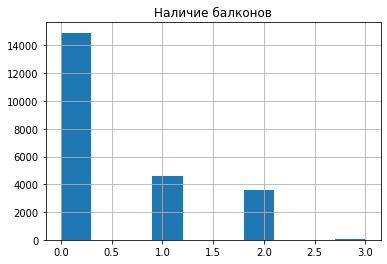

In [167]:
data.balcony.hist()
plt.title('Наличие балконов')
plt.show()

In [77]:
data.query('balcony > 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16.0,7900000.0,74.00,2016-05-04,3,2.65,14,59.0,8,False,...,12.0,5,санкт-петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
42,13.0,22000000.0,161.80,2015-07-08,4,2.80,4,80.9,2,False,...,17.6,5,петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
116,18.0,10999000.0,97.20,2017-11-13,3,2.50,16,45.0,16,NaN,...,18.3,5,санкт-петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
121,20.0,33000000.0,180.00,2017-02-17,3,2.90,9,86.0,8,False,...,24.0,4,санкт-петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0
250,13.0,3200000.0,51.70,2019-01-22,2,2.65,16,29.2,5,NaN,...,7.7,4,всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,10.0,4300000.0,52.00,2019-04-21,1,2.70,16,28.0,8,False,...,11.0,5,мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23474,16.0,5900000.0,40.50,2019-03-16,2,2.73,17,31.0,16,NaN,...,5.0,4,санкт-петербург,19901.0,21613.0,0.0,NaN,1.0,1003.0,NaN
23497,17.0,6150000.0,55.40,2019-04-22,2,2.80,20,29.4,16,NaN,...,9.6,4,санкт-петербург,16285.0,13873.0,0.0,NaN,1.0,481.0,NaN
23526,14.0,5800000.0,60.69,2018-03-13,3,2.50,9,39.7,2,NaN,...,6.2,5,санкт-петербург,51239.0,15954.0,0.0,NaN,0.0,NaN,30.0


In [78]:
data.loc[data['balcony'] > 3, 'balcony'] = 1

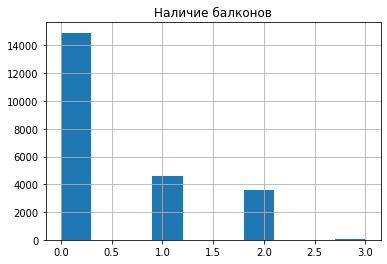

In [169]:
data.balcony.hist()
plt.title('Наличие балконов')
plt.show()

* Пропущеные значения количества балкогов были заменены на 0, поскольку пользователи не указывают число балконов, вероятно, потому что их нет. 
* Количество былконов больше 3 не соответствует метражу квартир. В системе Яндекс.Недвижимости обозначениям 4 и 5 соответствуют лоджии, поэтому решено было заменить в этих случаях количество балконов на 1. Это не соответствует медианному значению 0, поскольку пользователями была указано число, отличное от нуля. 

#### Параметры квартиры, выраженные булевыми значениями
**`is_apartment` — апартаменты (булев тип)**  
**`studio` — квартира-студия (булев тип)**  
**`open_plan` — свободная планировка (булев тип)**  

Эти 3 пункта мы рассмотрим вместе, поскольку они имеют один тип  и схожую природу данных. 

In [80]:
data.is_apartment.unique()

array([nan, False, True], dtype=object)

In [81]:
data.is_apartment.fillna(False)

0        False
1        False
2        False
4        False
5        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23148, dtype: bool

* В столбцах с отметкой студий и открытых планировок проблем с данными не обнаружено.
* В столбце с отметкой апартаментов большинство значений - пропуски, что соответствует тому, что, судя по предыдущим полученым данным, квартира не является апартаментами, а оставшиеся знаения в столбце соответствуют типу bool. Замена пропусков на False одновременно решила проблему пропусков и типов данных.  

#### Наличие водоёмов и парков в радиусе 3км. 
**`ponds_around3000` — число водоёмов в радиусе 3 км**  
**`parks_around3000` — число парков в радиусе 3 км**

In [82]:
data.ponds_around3000.describe()

count    17727.000000
mean         0.758053
std          0.930609
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [83]:
data.parks_around3000.describe()

count    17727.000000
mean         0.601850
std          0.791607
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [84]:
data.ponds_around3000.isna().sum()

5421

In [85]:
data.parks_around3000.isna().sum()

5421

In [86]:
data['ponds_around3000'] = data.ponds_around3000.fillna(0)
data['parks_around3000'] = data.parks_around3000.fillna(0)
data['ponds_around3000'] = data.ponds_around3000.astype('int')
data['parks_around3000'] = data.parks_around3000.astype('int')

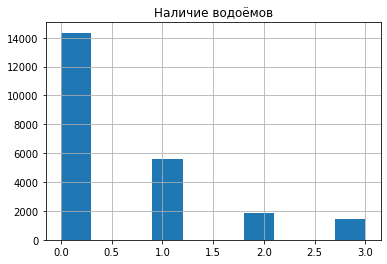

In [171]:
data.ponds_around3000.hist()
plt.title('Наличие водоёмов')
plt.show()

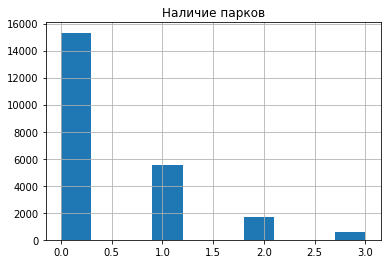

In [172]:
data.parks_around3000.hist()
plt.title('Наличие парков')
plt.show()

* Недостающие данные о количестве парков и водоёмов заменены на значение 0, поскольку пользователи, вероятнее всего, не указывали парк/водоём рядом, потому что их нет либо о них нет данных.

#### Информация о расстояниях дома до некоторых точек.
**`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`cityCenters_nearest` — расстояние до центра города (м)   
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`parks_nearest` — расстояние до ближайшего парка (м)**

In [89]:
data.airports_nearest.describe()

count    17706.000000
mean     28867.573308
std      12699.410347
min          0.000000
25%      18500.750000
50%      26880.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [90]:
data.loc[data['airports_nearest'] < 1000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,9.0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,NaN,...,6.0,2,санкт-петербург,0.0,22801.0,0,NaN,0,NaN,60.0


In [91]:
data.loc[data['airports_nearest'] < 1000, 'airports_nearest'] =\
data.loc[data['locality_name'] == 'санкт-петербург', 'airports_nearest'].median()

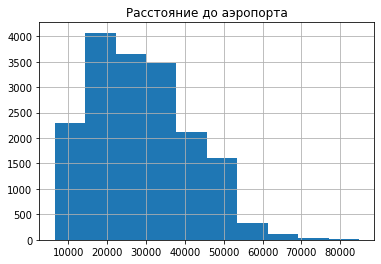

In [173]:
data.airports_nearest.hist()
plt.title('Расстояние до аэропорта')
plt.show()

In [93]:
data.cityCenters_nearest.describe()

count    17726.000000
mean     14324.898003
std       8606.575177
min        181.000000
25%       9490.250000
50%      13171.000000
75%      16355.250000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [94]:
data.loc[(data.cityCenters_nearest > 35000) & (data.locality_name == 'санкт-петербург')] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


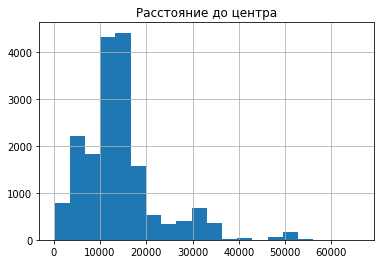

In [174]:
data.cityCenters_nearest.hist(bins=20)
plt.title('Расстояние до центра')
plt.show()

* Расстояние от единственного в данный момент действующего пассажирского аэропорта Пулково до ближайших жилых домов составлявляет около 1 км (Авиагородок) , поскольку нет нормативов по дальности строительства от аэропорта. Была обнаружена одна строка со значением, равным 0, и т.к. данная квартира находится в Санкт-Петербурге, значение дальности до аэропорта было заменено на медианное по Сант-Петербургу. 
* Пик на 30-35 км от центра объясняется активным развитием агломерации Санкт-Петербурга
* Значения до центра выше 40 км можно не рассматривать в дальнейшем анализе, т.к. это уже не Санкт-Петербург, а область. 
* Недостающие расстояния до центра решено оставить пустыми, т.к. приведение их к медианным или средним может повлиять на последующие расчеты. Будем иметь в виду, что выключим их при поиске корреляций. 


In [96]:
data.ponds_nearest.describe()

count    8797.000000
mean      521.166534
std       277.664337
min        13.000000
25%       298.000000
50%       505.000000
75%       733.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [97]:
data.ponds_nearest.where(data.ponds_nearest < 3000, np.nan)

0        755.0
1          NaN
2        574.0
4         48.0
5          NaN
         ...  
23694    381.0
23695      NaN
23696      NaN
23697    196.0
23698      NaN
Name: ponds_nearest, Length: 23148, dtype: float64

In [98]:
data.loc[data.ponds_nearest.notna() & (data.ponds_around3000 == 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [99]:
data.parks_nearest.describe()

count    7830.000000
mean      492.525287
std       343.469365
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [100]:
data.loc[data.ponds_nearest > 3000, 'ponds_nearest'] = np.nan

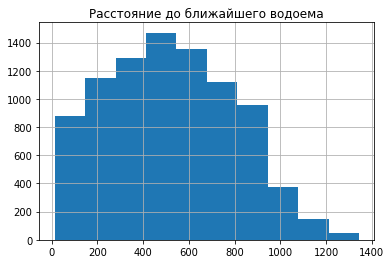

In [177]:
data.ponds_nearest.hist()
plt.title('Расстояние до ближайшего водоема')
plt.show()

In [102]:
data.parks_nearest.describe()

count    7830.000000
mean      492.525287
std       343.469365
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [103]:
data.loc[data.parks_nearest > 3000, 'parks_nearest'] = np.nan

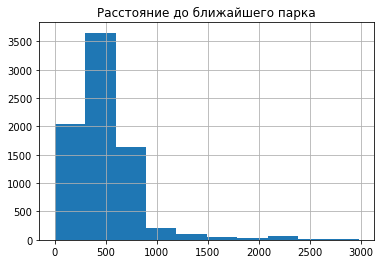

In [176]:
data.parks_nearest.hist()
plt.title('Расстояние до ближайшего парка')
plt.show()

* Среди данных о колличестве прудов и парков были пропуски. Их заменили на значение 0, поскольку, если не указан пруд или парк, то, по всей видимости, его рядом нет.  
* Гистограммы по паркам и прудам имеют распереление Пуассона и нормальное распределение соответственно. 
* Были удалены значения рассстояний до парков и водоёмов более 3000м, поскольку в данных рассматривалось количество в радиусе 3000 м. 
* Отсутствующие значения оставлены и будут учтены при дальнейшем анализе. 

 #### **`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)**

In [105]:
data.days_exposition.describe()

count    20048.000000
mean       180.018855
std        218.590344
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [106]:
data.days_exposition.isna().sum()

3100

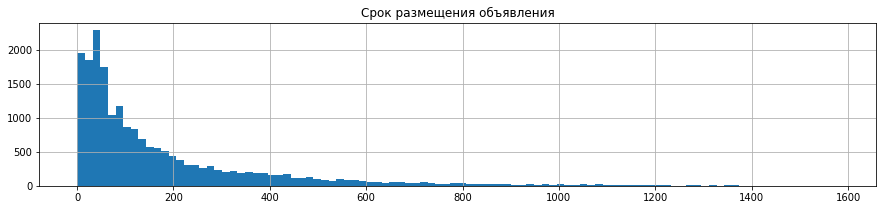

In [178]:
data.days_exposition.hist(bins=100, figsize=(15, 3))
plt.title('Срок размещения объявления')
plt.show()

In [108]:
data.iloc[:, 4:20].duplicated().sum()

51

In [109]:
data.iloc[:, 4:21].drop_duplicates()

,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,3,2.70,16,51.0,8,NaN,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0
1,1,2.65,11,18.6,1,NaN,False,False,11.00,2,шушары,12817.0,18603.0,0,NaN,0,NaN
2,2,2.65,5,34.3,4,NaN,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0
4,2,3.03,14,32.0,13,NaN,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0
5,1,2.65,12,14.4,5,NaN,False,False,9.10,0,янино-1,NaN,NaN,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,3,3.70,5,73.3,3,NaN,False,False,13.83,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0
23695,3,2.65,5,38.0,4,NaN,False,False,8.50,0,тосно,NaN,NaN,0,NaN,0,NaN
23696,2,2.65,3,29.7,1,NaN,False,False,8.73,0,рождествено,NaN,NaN,0,NaN,0,NaN
23697,2,3.00,17,30.5,12,NaN,False,False,23.30,2,санкт-петербург,39140.0,10364.0,2,173.0,3,196.0


In [110]:
cleared = (23699 - 23079) / 23699 * 100
cleared

2.616144141103

In [111]:
data = data.reset_index(drop=True)

* В столбце со сроком публикации отсутствующие значения были оставлены, т.к. приведение их к среднему или медиане влечет за собой искажение дальнейших расчетов.
* Было предположено, что некоторые публикации могли повторяться, поэтому данные в таблице сравнили по основным столбцам, исключив дату и срок публикации. Было выявлено 51 повтор, который был удален. Вероятно, в датасете есть еще повторения, которые вызваны ошибочно введенными данными, с последующим удалением объявления и публикацией нового, но для этого требуется более глубокий анализ. 

### Посчитайте и добавьте в таблицу новые столбцы

In [112]:
data['m_price'] = data.last_price / data.total_area
data['m_price'] = data.m_price.round()

In [113]:
data['weekday_exp'] = data.first_day_exposition.dt.weekday
data['month_exp'] = data.first_day_exposition.dt.month
data['year_exp'] = data.first_day_exposition.dt.year

In [114]:
def f_type(row):
    if row.floor == 1:
        return 'первый'
    if row.floor == row.floors_total:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(f_type, axis='columns')

In [115]:
data['center_km'] = data.cityCenters_nearest / 1000
data['center_km'] = data.center_km.round()

In [116]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m_price,weekday_exp,month_exp,year_exp,floor_type,center_km
0,20.0,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,482.0,2,755.0,NaN,120370.0,3,3,2019,другой,16.0
1,7.0,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,NaN,...,NaN,0,NaN,81.0,82921.0,1,12,2018,первый,19.0
2,10.0,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,NaN,...,90.0,2,574.0,558.0,92786.0,3,8,2015,другой,14.0
3,9.0,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,112.0,1,48.0,121.0,100000.0,1,6,2018,другой,8.0
4,10.0,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,NaN,...,NaN,0,NaN,55.0,95066.0,0,9,2018,другой,NaN
5,6.0,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,NaN,...,NaN,0,NaN,155.0,99196.0,3,11,2017,другой,19.0
6,5.0,7915000.0,71.60,2019-04-18,2,2.65,24,30.50,22,NaN,...,NaN,0,NaN,NaN,110545.0,3,4,2019,другой,12.0
7,20.0,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,NaN,...,NaN,0,NaN,189.0,87455.0,2,5,2018,другой,NaN
8,18.0,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,NaN,0,NaN,289.0,88525.0,6,2,2017,другой,15.0
9,5.0,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,NaN,...,310.0,2,553.0,137.0,127525.0,3,11,2017,другой,14.0


Добавлены следующие столбцы данных:  
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

### Проведите исследовательский анализ данных

####  Изучениев параметров объектов 

##### Общая площадь, количество комнат, жилая площадь, площадь кухни*    
* Превалирующие большинство квартир - до 3х комнат, пики в гистограмме их общей  площади соответствуют площадям квартир с 1, 2 и 3 комнатами площадью до 60 кв.м. 
* Площадь кухни варьируется меньше. В большинстве квартир площадь кухни укладывается в промежуток от 5 до 20 кв.м.

<AxesSubplot:>

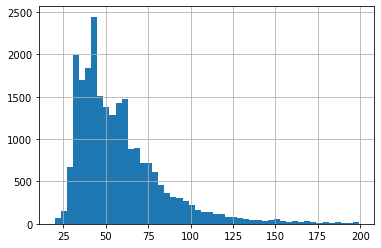

In [117]:
data.total_area.hist(bins=50)

<AxesSubplot:>

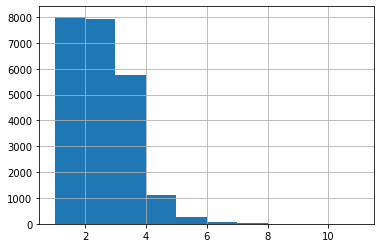

In [118]:
data.rooms.hist()

<AxesSubplot:>

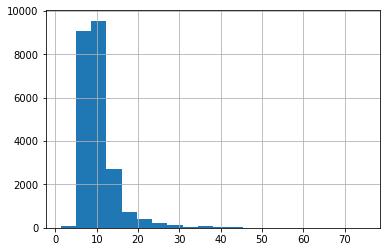

In [119]:
data.kitchen_area.hist(bins=20)

##### Цена объекта
Распределение цены имеет вид Пуассона, с пиком вначале, что соответствует предыдущим данным о том, что на рынке неджижимости больше всего небольших квартир.

<AxesSubplot:>

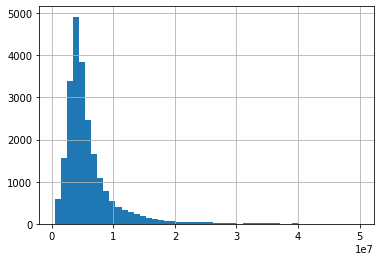

In [120]:
data.last_price.hist(bins=50)

##### Высота потолков
Выстота потолков отражает стандартные высоты в большинстве случаев - 2,65 и 2,75м. Величины до 3,3м охватывают историческую и сталинскую застройку. 


<AxesSubplot:>

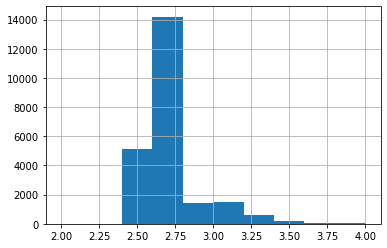

In [121]:
data.ceiling_height.hist(range=(2, 4))

##### Этаж квартиры, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме.*
* Количество этажей в доме в целом отражает массовое типовое строительство 5 и 9-этажных домов, и тренды последних десятилетий на строительство многоэтажных жилых комплексов. Поскольку в Петербурге есть ограничения на строительство по высоте зданий, большинство не превышает 24 этажей, за исключением редких случаев на окраинах города или в агломерации. 
* Распределение этажей, на которых располодены квартиры показывает, что большинство квартир находится ниже 10 этажа, что соответствует тому, что медиана в этажности домов находится на 9 этаже, и более высокие дома тоже имеют этажи ниже 10го. При этом пик находится вовсе ниже 5 этажа. 
* Большинство квартир ожидаемо находится не на 1м или последним этажах. Количество представленных квартир на 1 этаже несколько меньше, чем на последнем, что можно объяснить коммерческими первыми этажами в части домов.


<AxesSubplot:>

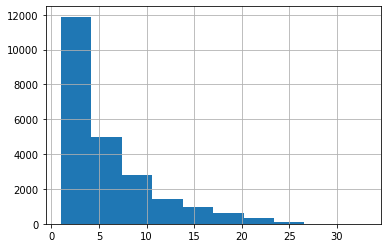

In [122]:
data.floor.hist(bins=10)

<AxesSubplot:>

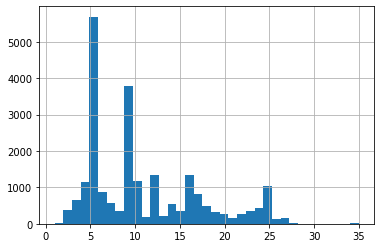

In [123]:
data.floors_total.hist(bins=35)

<AxesSubplot:>

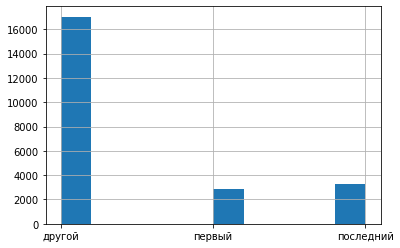

In [124]:
 data.floor_type.hist()

##### Расстояние до центра города в метрах* 
* Ближе к центру продается меньше квартир, чем на окраинах
* Основной пик приходится на 10км, что соотвествует большинству жилых районов города. 
* Пик на 30-35 км от центра объясняется активным развитием агломерации Санкт-Петербурга
* Пик на 50 км вероятно объясняется развитием населенных пунктов ЛенОбласти, но не исключены и ошибочные значения. 

<AxesSubplot:>

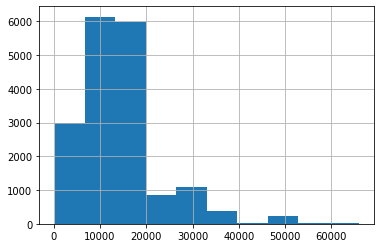

In [125]:
data.cityCenters_nearest.hist()

##### Расстояние до ближайшего аэропорта*
* Расстояния до 30 км соответствуют основным жилым районам Санкт-Петербурга, до 55кмм - агломерции, свыше 55км - Ленинградской области.
* Малое количество близлежащих квартир объясняется тем, что аэропорт находится в пригороде.

<AxesSubplot:>

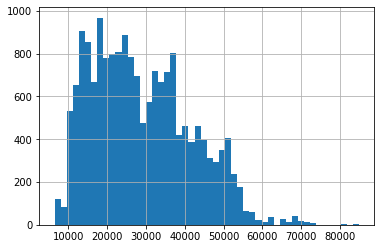

In [126]:
data.airports_nearest.hist(bins=50)

##### Расстояние до ближайшего парка*
* Данные показывают, что в подавляющем большинстве ближайший парк находится на расстоянии менее 1 км, и чаще всего - на расстоянии около 500м. 

<AxesSubplot:>

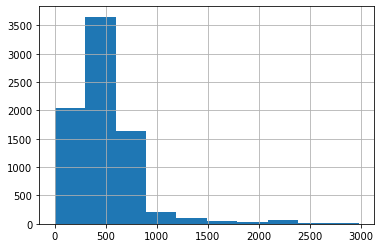

In [127]:
data.parks_nearest.hist()

##### День и месяц публикации объявления*
* По будням чаще выкладывали объявления. Это может быть связано с работой риэлторов
* Чаще всего объявления о продаже квартир выкладывали в декабре и январе, и меньше всего в мае. 

<AxesSubplot:>

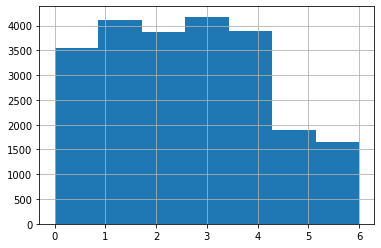

In [128]:
data.weekday_exp.hist(bins=7)

<AxesSubplot:>

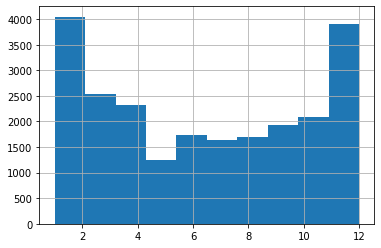

In [129]:
data.month_exp.hist()

#### Изучите, как быстро продавались квартиры.

Среднее составляет: 168.6 дней   
Медиана составляет:  95 дней  
Продажа чаще всего занимает: 45 дней (мода по выборке)   
* Для того, чтобы определить, какие продажи можно считать быстрыми, а какие слишком медленными, построили диаграмму размаха.

Быстрыми можно считать продажи, отвечающие первому квантилю в распределении: 45 дней.   
Поскольку выносов в эту сторону нет, то слишком быстрыми продажами мы ничего не будем считать.       
Слишком медленными можно считать продажи свыше 500 дней (выносы в диаграмме размаха).      


In [130]:
data.days_exposition.describe()

count    20048.000000
mean       180.018855
std        218.590344
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

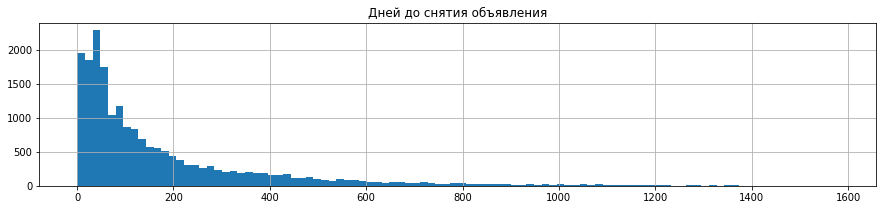

In [179]:
data.days_exposition.hist(bins=100, figsize=(15, 3))
plt.title('Дней до снятия объявления')
plt.show()

In [132]:
data.days_exposition.mode()

0    45.0
dtype: float64

<AxesSubplot:>

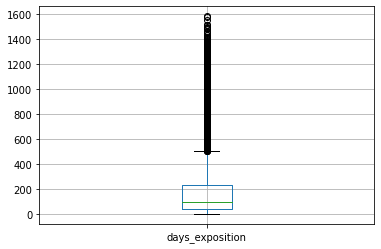

In [133]:
data.boxplot(column='days_exposition')

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
 Изучим, зависит ли цена от:  
* общей площади;  
* жилой площади;  
* площади кухни;  
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

In [181]:
data['last_price'].corr(data['total_area'])

0.7670200153149634

In [135]:
data['last_price'].corr(data['living_area'])

0.6291061210170457

In [136]:
data['last_price'].corr(data['kitchen_area'])

0.5654284495020108

In [137]:
data['last_price'].corr(data['rooms'])

0.4691880740163923

In [138]:
data['last_price'].corr(data['weekday_exp'])

-0.016662562900856017

In [139]:
data['last_price'].corr(data['month_exp'])

0.003741045451616086

In [140]:
data['last_price'].corr(data['year_exp'])

-0.03867506705210724

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>],
       [<AxesSubplot:xlabel='last_pric

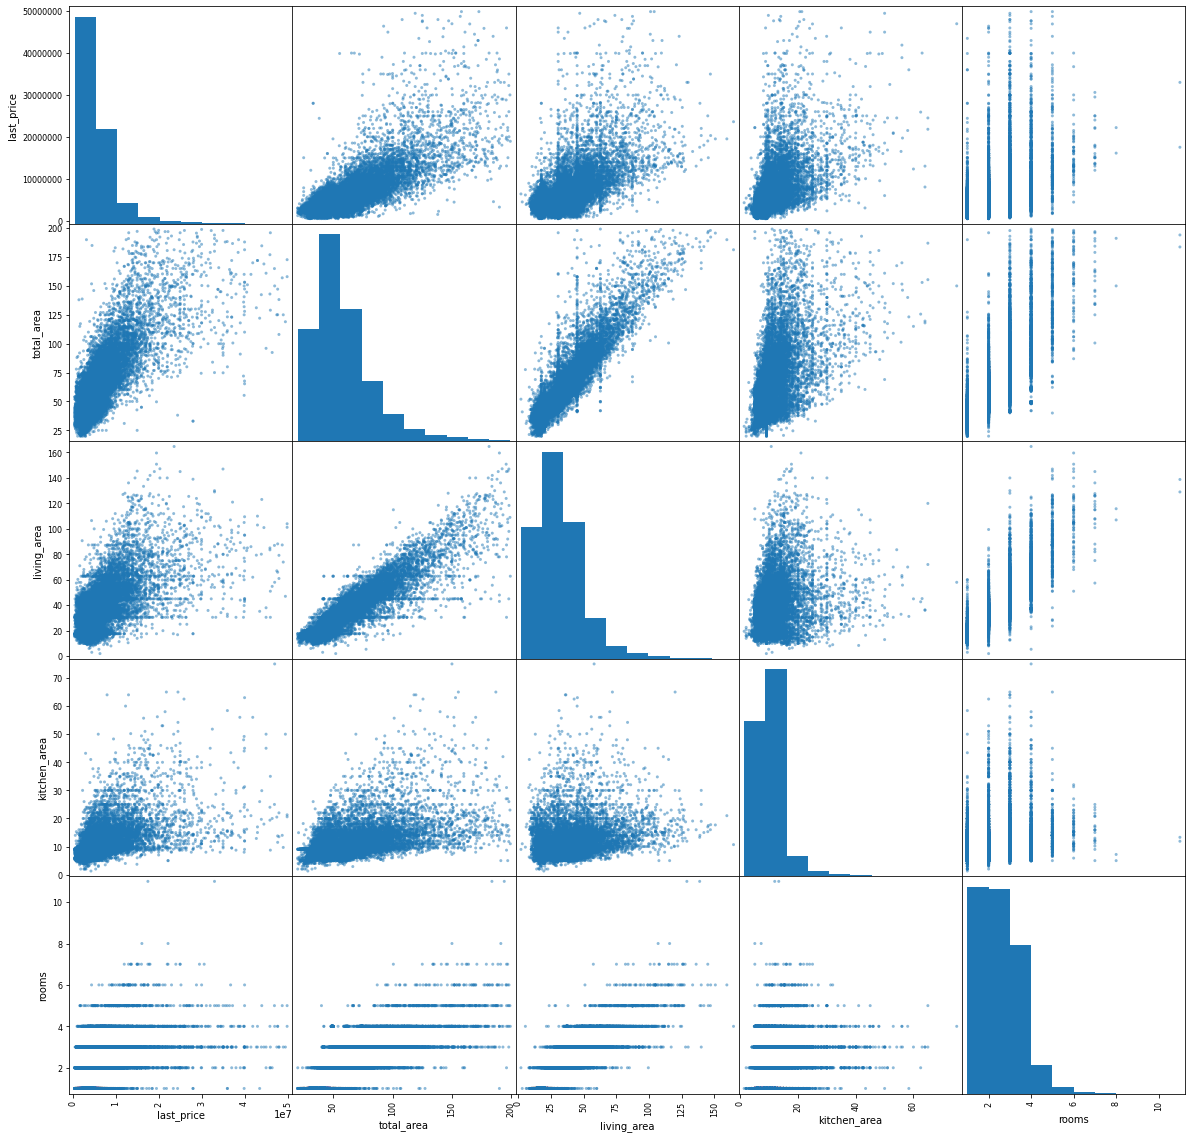

In [141]:
data_pivot1 = data.loc[:, ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']]
pd.plotting.scatter_matrix(data_pivot1, figsize=(20, 20))

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='weekday_exp', ylabel='last_price'>,
        <AxesSubplot:xlabel='month_exp', ylabel='last_price'>,
        <AxesSubplot:xlabel='year_exp', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='weekday_exp'>,
        <AxesSubplot:xlabel='weekday_exp', ylabel='weekday_exp'>,
        <AxesSubplot:xlabel='month_exp', ylabel='weekday_exp'>,
        <AxesSubplot:xlabel='year_exp', ylabel='weekday_exp'>],
       [<AxesSubplot:xlabel='last_price', ylabel='month_exp'>,
        <AxesSubplot:xlabel='weekday_exp', ylabel='month_exp'>,
        <AxesSubplot:xlabel='month_exp', ylabel='month_exp'>,
        <AxesSubplot:xlabel='year_exp', ylabel='month_exp'>],
       [<AxesSubplot:xlabel='last_price', ylabel='year_exp'>,
        <AxesSubplot:xlabel='weekday_exp', ylabel='year_exp'>,
        <AxesSubplot:xlabel='month_exp', ylabel='year_exp'>,
        <AxesSubplot:xlabel='year_exp', ylabel='y

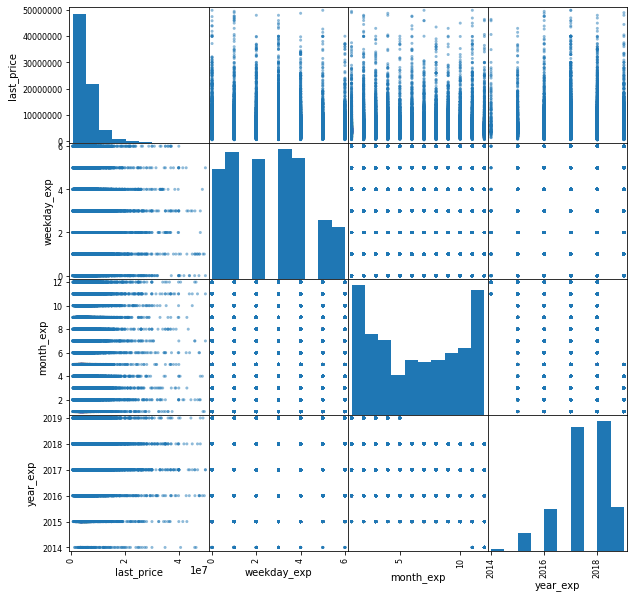

In [142]:
data_pivot2 = data.loc[:, ['last_price', 'weekday_exp', 'month_exp', 'year_exp']] 
pd.plotting.scatter_matrix(data_pivot2, figsize=(10, 10))

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

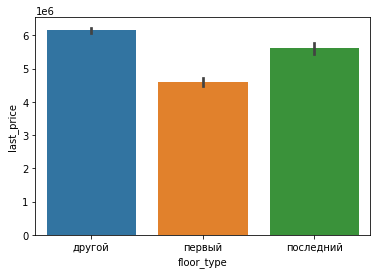

In [143]:
sb.barplot(y=data['last_price'], x=data['floor_type'])

<AxesSubplot:>

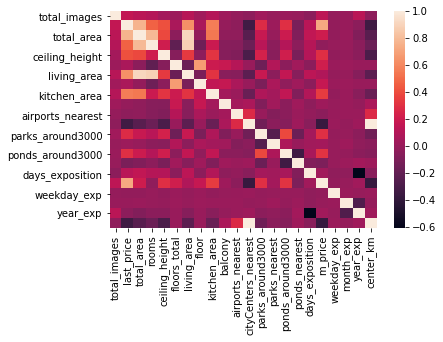

In [184]:
sb.heatmap(data.corr())

На основании вычисленных коэффициентов корреляций и визуализированных данных:  

* Цена квартиры напрямую зависит от общей площади, а также жилой площади, кухни и количества комнат, т.к. они эти величины также взаимосвязаны между собой.
* Однако, чем больше ниже эти значения, тем больше выражена зависимость. 
* Зависимость с размером кухни меньше, поскольку диапазон размеров кухонь тоже меньше, и не настолько широк, как общей площади. * Зависимости цены от дня недели, месяца не обнаружено. 
* Прямой зависимости от года подачи объявления тоже нет, но на визуализированных данных наблюдается сначала рост стоимости недвижимости, потом некоторый спад.
* Прослеживается небольшая зависимость цены квартиры от этажа, на котором она расположена. Квартиры на первых этажах дешевле остальных, квартиры, находящиеся не на крайних этажах в среднем дороже. 

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.*   

In [144]:
data.groupby('locality_name')['m_price'].count().sort_values(ascending=False).head(10)

locality_name
санкт-петербург    15327
мурино               562
кудрово              451
шушары               436
всеволожск           392
пушкин               363
колпино              337
парголово            322
гатчина              307
выборг               237
Name: m_price, dtype: int64

In [145]:
pt = data.pivot_table(index='locality_name', values='m_price', aggfunc=['count','median'])
pt.columns = ['count','median']
pt.sort_values(by='count', ascending=False).head(10)

,count,median
locality_name,,
санкт-петербург,15327,104396.0
мурино,562,84801.5
кудрово,451,95349.0
шушары,436,76748.0
всеволожск,392,65789.0
пушкин,363,99987.0
колпино,337,74722.0
парголово,322,91984.5
гатчина,307,67797.0


<AxesSubplot:xlabel='median', ylabel='locality_name'>

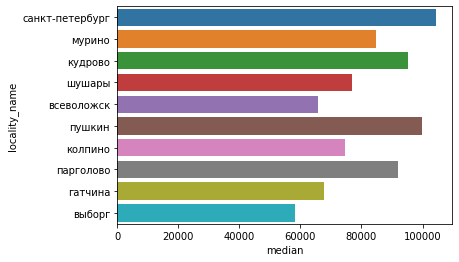

In [195]:
pt_top10 = pt.sort_values(by='count', ascending=False).head(10)
sb.barplot(data=pt_top10, x='median', y=pt_top10.index)

В число населенных пунктов  набибольшим количеством объявлений попали:  
* Санкт-Петебург - самая высокая медианная стоимость 1 кв.м, составляет 104 тыс.руб.     
* Мурино  
* Кудрово  
* Шушары  
* Всеволожск  
* Пушкин - самая высокая медианная стоимость 1 кв.м., если исключить Санкт-Петербург, составляет 100 тыс.руб
* Колпино  
* Парголово  
* Гатчина  
* Выборг - самая низкая стоимость 1 кв.м. среди 10 населенных пунктов с максимальным числом объявлений. Составляет 58 тыс. руб. 


*4.5 Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.*

In [146]:
spb_data = data.loc[data.locality_name == 'санкт-петербург', ['m_price', 'center_km']]
spb_data.pivot_table(values='m_price', index='center_km', aggfunc='median')

,m_price
center_km,
0.0,142138.5
1.0,125136.0
2.0,119531.0
3.0,108098.0
4.0,117541.5
5.0,126786.0
6.0,128964.0
7.0,123958.0
8.0,122533.0


<AxesSubplot:xlabel='center_km', ylabel='m_price'>

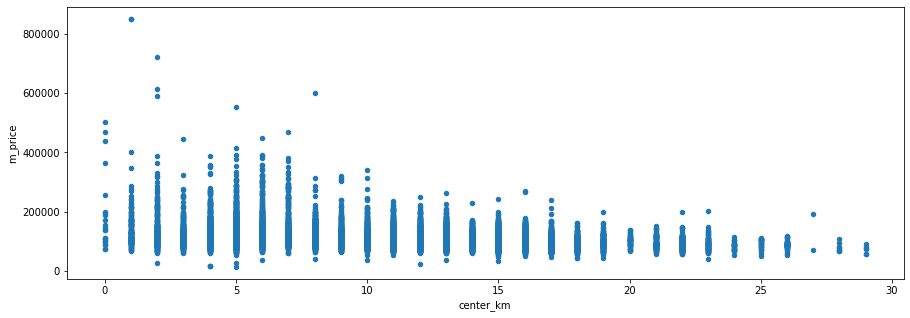

In [147]:
spb_data.plot(y='m_price', x='center_km', figsize=(15, 5), kind='scatter')

In [148]:
spb_data.corr()

,m_price,center_km
m_price,1.000000,-0.344764
center_km,-0.344764,1.000000


* Изучая значения медианной стоимости жилья на разных расстояних, можно сказать, то есть небольшая обратная зависимость цены за квадратный метр от расстояния до центра, но на определенных расстояних есть районы с более дорогостоящей застройкой
* Стоит обратить внимание, что многие пригороды официально входят в состав Санкт-Петербурга, в частности Сестрорецк и небольшие населенные пункты курортного района с дорогостоящим жильём, а также Пушкин, Павловск и прилежащие территории с элитной недвижимостью. В объявлениях они могут быть указаны как Санкт-Петербург. 

### Общий вывод

1. Предобработка данных включала в себя:  
1. 1. Обработка пропусков:
* Пропущенные значения жилой площади и площади кухонь были заполнены медианными значениями для квартир с аналогичным количеством комнат.
* Пропущенные значения высоты полтолков замены на медианные
* Пропущеные значения количества балконов были заменены на 0, поскольку пользователи не указывают число балконов, вероятно, потому что их нет. 
* В столбце с отметкой апартаментов большинство значений - пропуски, что соответствует тому, что, судя по предыдущим полученым данным, квартира не является апартаментами, а оставшиеся знаения в столбце соответствуют типу bool. Замена пропусков на False одновременно решила проблему пропусков и типов данных.
* Недостающие данные о количестве парков и водоёмов заменены на значение 0, поскольку пользователи, вероятнее всего, не указывали парк/водоём рядом, потому что их нет либо о них нет данных.
* Остальные пропуски оставили, поскольку восстановить их значения не представляется возможным. Их наличие учтено при дальнейших расчетах. 
1. 2. Типы данных:
* Тип данных столбца с датой пубдикации объявления был изменен на datetime для удобства последующего анализа.
* Тип данных столбцов с числом комнат, этажей, балконов, парков, водоёмов изменен на целочисленный.
1. 3. Аномальные значения в данных:
* Локальный пик на 0 фотографий. Это выглядит как ошибка, поскольку по правилам Яндекс.Недвижимости можно размещать от 3 фотографий для жилых помещений, иначе объявление не пройдет модерацию. Ссылка на [Справку](https://yandex.ru/support/realty/rules/requirements-ads.html) Локальный пик на 20 фотографиях, что может быть обусловлено максимальным или рекомендуемым количеством фотографий. На момент исследования (июнь 2023 года) максимум фотографий составляет 30 (указано при добавлении [нового объявления](https://realty.ya.ru/management-new/add/)). Можно предположить, что в 2019 году, когда был составлен исследуемый датасет, максимум фотографий или рекомендуемое их количество составляло 20. Значения ниже 3 и выше 20 похожи на ошибочные. Их заменили на медианные значения по столбцу в пределах от 3 до 20 фото. 
* Обнаружилась 1 позиция со стоимостью менее 150 000, находящаяся в 9 км от центра Санкт-Петербурга, с прощадью более 100 кв.м, на 25 этаже 25-этажного дома. Похоже, что стоимость этой квартиры записана пользователем не в рублях, а в тысячах рублей, поэтому цена была умножена на 1000. 
* Также было принято решение не брать во внимание при дальнейших расчетах квартиры стоимостью более 50 млн, поскольку данные по ним также сильно выбиваются из остальных, например, площади квартир, высота потолков и т.д, и они могут негативно отразиться на общей статистике. Таких объектов было 131 и все они находятся в Санкт-Пеьербурге.
* Значение комнат 0 по общей и жилой площади, соответствовало однокомнатным квартирам и квартирам-студиям, поэтому число комнат было изменено в этом случае на 1. 
* Высоты потолков 100 и 1 м заменены на медианные, потолки выше 24 м можно считать ошибочно введенными без десятичной запятой, поэтому из значения разделены на 10. Также полтолки выше 4 метров в квартирах тоже являются выносом и заменены на медианные.
* Количество былконов больше 3 не соответствует метражу квартир. В системе Яндекс.Недвижимости обозначениям 4 и 5 соответствуют лоджии, поэтому решено было заменить в этих случаях количество балконов на 1. Это не соответствует медианному значению 0, поскольку пользователями была указано число, отличное от нуля. 
* Значения этажей 34-37 приведены к 35, что соответствует ЖК "Князь Александр Невский" (единственному ЖК в городе выше 33 этажей)
* Исправлено значение 60 на 6 в дома в Кронштадте, поскольку там нет и не было высотного строительства. 
* Расстояние от единственного в данный момент действующего пассажирского аэропорта Пулково до ближайших жилых домов составлявляет около 1 км (Авиагородок) , поскольку нет нормативов по дальности строительства от аэропорта. Была обнаружена одна строка со значением, равным 0, и т.к. данная квартира находится в Санкт-Петербурге, значение дальности до аэропорта было заменено на медианное по Сант-Петербургу. 
* Были удалены значения рассстояний до парков и водоёмов более 3000м, поскольку в данных рассматривалось количество в радиусе 3000 м. 
1. 4. Было предположено, что некоторые публикации могли повторяться, поэтому данные в таблице сравнили по основным столбцам, исключив дату и срок публикации. Было выявлено 51 повтор, который был удален. Вероятно, в датасете есть еще повторения, которые вызваны ошибочно введенными данными, с последующим удалением объявления и публикацией нового, но для этого требуется более глубокий анализ. 
1. 5. Для унификации названий населенных пунктов было проведено следующее:
* все названия были переведены в нижний регистр
* буква "ё" заменена на "е"
* исключены строки с отстутствующим значением, т.к. не представляется возможным его установить
* из названий исключены типы населенных пунктов
* согласованы повторяющиеся названия
1. 6. В результате предобработки из датасета было удалено 2,6% строк.

2. Добавлены следующие столбцы данных:

* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до * целых значений).

3. Был проведен [исследовательский анализ данных](### Проведите исследовательский анализ данных)
* Построены гистограммы и описаны значения по основным параметрам объявлений продажи квартир

4. 1. Изучено, как быстро продавались квартиры.

* Среднее составляет: 168.6 дней   
* Медиана составляет:  95 дней  
* Продажа чаще всего занимает: 45 дней (мода по выборке)   
* Быстрыми можно считать продажи, отвечающие первому квантилю в распределении: 45 дней.          
* Слишком медленными можно считать продажи свыше 500 дней (выносы в диаграмме размаха).  

4. 2. На основании вычисленных коэффициентов корреляций и визуализированных данных на стоимость квартиры влияют следующие факторы:  

* Цена квартиры напрямую зависит от общей площади, а также жилой площади, кухни и количества комнат, т.к. они эти величины также взаимосвязаны между собой.
* Однако, чем больше ниже эти значения, тем больше выражена зависимость. 
* Зависимость с размером кухни меньше, поскольку диапазон размеров кухонь тоже меньше, и не настолько широк, как общей площади. * Зависимости цены от дня недели, месяца не обнаружено. 
* Прямой зависимости от года подачи объявления тоже нет, но на визуализированных данных наблюдается сначала рост стоимости недвижимости, потом некоторый спад.
* Прослеживается небольшая зависимость цены квартиры от этажа, на котором она расположена. Квартиры на первых этажах дешевле остальных, квартиры, находящиеся не на крайних этажах в среднем дороже. 

4. 3. Определена нааибольшая и наименьшая стоимость 1 кв.м. среди 10 населенных пунктов с максимальным числом объявлений.

* Санкт-Петебург - самая высокая медианная стоимость 1 кв.м, составляет 104 тыс.руб.
* Пушкин - самая высокая медианная стоимость 1 кв.м., если исключить Санкт-Петербург, составляет 100 тыс.руб
* Выборг - самая низкая стоимость 1 кв.м. и составляет 58 тыс. руб.

4. 4. Проанализирована зависимость цены 1 кв.м. в заисимости от отдаленности о

* Изучая значения медианной стоимости жилья на разных расстояних, можно сказать, то есть небольшая обратная зависимость цены за квадратный метр от расстояния до центра, но на определенных расстояних есть районы с более дорогостоящей застройкой
* Стоит обратить внимание, что многие пригороды официально входят в состав Санкт-Петербурга, в частности Сестрорецк и небольшие населенные пункты курортного района с дорогостоящим жильём, а также Пушкин, Павловск и прилежащие территории с элитной недвижимостью. В объявлениях они могут быть указаны как Санкт-Петербург. 